In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat

In [2]:
data=pd.read_csv("Wine.csv")

In [3]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [6]:
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [7]:
data['Alcohol'].nunique()

126

In [8]:
df=data.drop('Alcohol',axis=1)
df

,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...
173,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


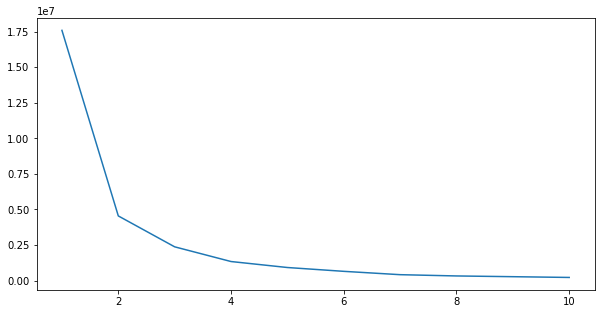

In [9]:
#elbow method
plt.figure(figsize=(10,5))
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.show()

In [10]:
#KMeans
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state=42)
labels_2 = kmeans.fit_predict(df)
labels_2

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [11]:
#Silhoutte Score
from sklearn.metrics import silhouette_score
score_2 = silhouette_score(df, labels_2, metric='euclidean')
print('Silhouette Score: %.3f' % score_2)

Silhouette Score: 0.657


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

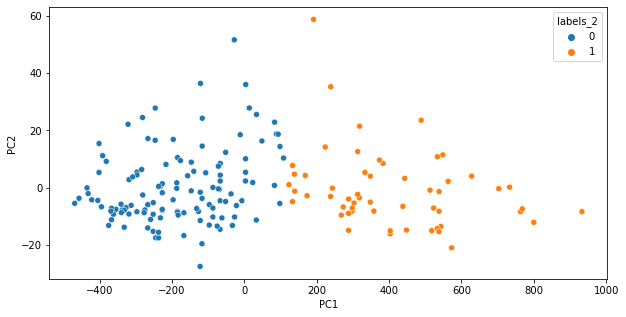

In [12]:
# Visualization
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
c = pd.DataFrame(pca.fit_transform(df), columns=["PC1", "PC2"])
c['labels_2'] = labels_2
plt.figure(figsize=(10,5))
sns.scatterplot(x=c['PC1'],y=c['PC2'],hue=c['labels_2'])

In [13]:
#Normalization
from sklearn import preprocessing
X=preprocessing.normalize(df)
X=pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.001594,0.002265,0.014543,0.118393,0.002610,0.002853,0.000261,0.002135,0.005258,0.000970,0.003654,0.992825
1,0.001687,0.002029,0.010618,0.094801,0.002512,0.002617,0.000246,0.001213,0.004152,0.000995,0.003223,0.995414
2,0.001984,0.002245,0.015637,0.084911,0.002354,0.002724,0.000252,0.002362,0.004775,0.000866,0.002665,0.996237
3,0.001314,0.001684,0.011317,0.076123,0.002594,0.002351,0.000162,0.001469,0.005255,0.000579,0.002324,0.997008
4,0.003478,0.003854,0.028197,0.158443,0.003760,0.003612,0.000524,0.002444,0.005801,0.001396,0.003934,0.986909
...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.007569,0.003282,0.027464,0.127273,0.002251,0.000817,0.000697,0.001420,0.010316,0.000857,0.002331,0.991392
174,0.005163,0.003275,0.030371,0.134687,0.002377,0.000990,0.000568,0.001862,0.009639,0.000924,0.002060,0.990349
175,0.005072,0.002678,0.023700,0.142198,0.001884,0.000818,0.000510,0.001600,0.012087,0.000699,0.001849,0.989459
176,0.003051,0.002792,0.023562,0.141372,0.001944,0.000801,0.000624,0.001720,0.010956,0.000707,0.001909,0.989601


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


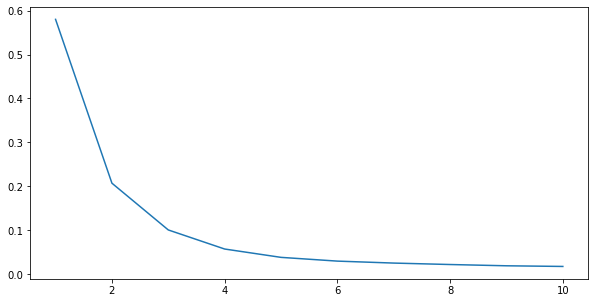

In [14]:
# Elbow method
plt.figure(figsize=(10,5))
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)

plt.show()

In [15]:
#KMeans
kmeans1 = KMeans(n_clusters = 3, init = 'k-means++', random_state=42)
labels_no = kmeans1.fit_predict(X)
labels_no

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 2, 2, 0,
       0, 0, 0, 2, 1, 2, 0, 0, 1, 2, 2, 2, 0, 2, 2, 1, 1, 0, 0, 2, 0, 0,
       1, 1, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 2, 2, 1, 2, 0, 0, 2, 0,
       0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 2, 2, 2, 2, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [16]:
#Silhouette Score
score_no = silhouette_score(X, labels_no, metric='euclidean')
print('Silhouette Score: %.3f' % score_no)

Silhouette Score: 0.525


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

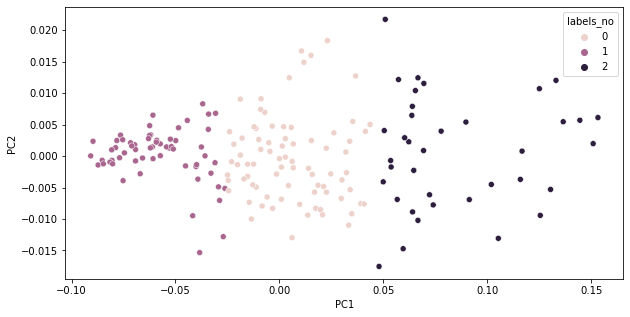

In [17]:
# Visualization
pca = PCA(n_components = 2)
b = pd.DataFrame(pca.fit_transform(X), columns=["PC1", "PC2"])
b['labels_no'] = labels_no
plt.figure(figsize=(10,5))
sns.scatterplot(x=b['PC1'],y=b['PC2'],hue=b['labels_no'])

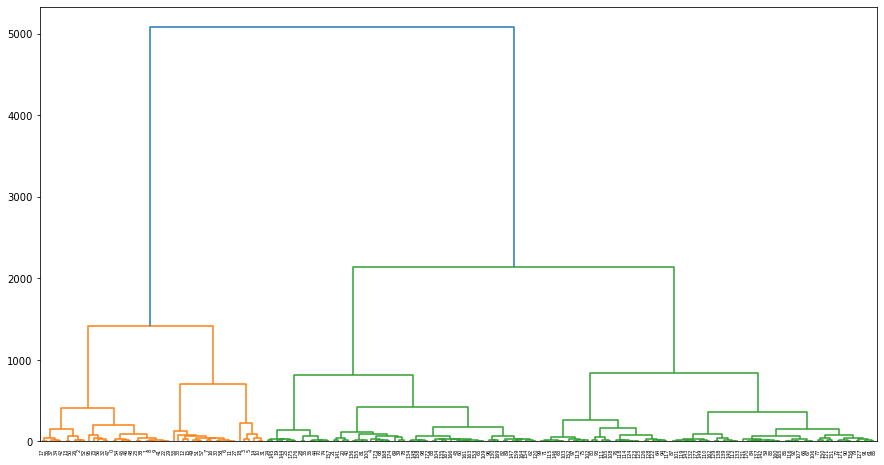

In [18]:
#dendrogram
from scipy.cluster.hierarchy import dendrogram,linkage
linked=linkage(df,method="ward")
plt.figure(figsize=(15,8))
dendrogram(linked,orientation="top",distance_sort="ascending",show_leaf_counts=True)
plt.show()

In [19]:
# Heirarchial Clustering
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=2,affinity="euclidean",linkage="ward")
labels_hc=cluster.fit_predict(df)
labels_hc

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [20]:
#Silhouette Score
score_hc = silhouette_score(df, labels_hc, metric='euclidean')
print('Silhouette Score: %.3f' % score_hc)

Silhouette Score: 0.659


In [21]:
#Heirarchial Clustering
cluster=AgglomerativeClustering(n_clusters=2,affinity="euclidean",linkage="ward")
labels_hc1=cluster.fit_predict(X)
labels_hc1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [22]:
# Silhouette Score
score_hc1 = silhouette_score(df, labels_hc1, metric='euclidean')
print('Silhouette Score: %.3f' % score_hc1)

Silhouette Score: 0.210


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

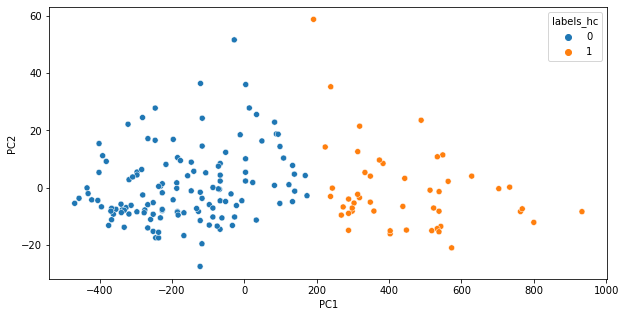

In [23]:
# Visualization
pca = PCA(n_components = 2)
a = pd.DataFrame(pca.fit_transform(df), columns=["PC1", "PC2"])
a['labels_hc'] = labels_hc
plt.figure(figsize=(10,5))
sns.scatterplot(x=a['PC1'],y=a['PC2'],hue=a['labels_hc'])

In [24]:
data['labels_2']=labels_2
data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,labels_2
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,0
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,0
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,0
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,0


In [25]:
pc=data[data['labels_2']==0]
npc=data[data['labels_2']==1]

In [27]:
pd.DataFrame(pc['Alcohol']).to_numpy()

array([[13.24],
       [13.64],
       [14.06],
       [12.93],
       [13.5 ],
       [13.05],
       [14.22],
       [13.56],
       [13.24],
       [12.37],
       [12.33],
       [12.64],
       [13.67],
       [12.37],
       [12.17],
       [12.37],
       [13.11],
       [12.37],
       [13.34],
       [12.21],
       [13.86],
       [13.49],
       [11.66],
       [13.03],
       [11.84],
       [12.33],
       [12.7 ],
       [12.  ],
       [12.72],
       [12.08],
       [13.05],
       [11.84],
       [12.67],
       [12.16],
       [11.65],
       [11.64],
       [12.08],
       [12.08],
       [12.  ],
       [12.69],
       [12.29],
       [11.62],
       [11.81],
       [12.29],
       [12.37],
       [12.29],
       [12.08],
       [12.6 ],
       [12.34],
       [11.82],
       [12.51],
       [12.42],
       [12.25],
       [12.72],
       [12.22],
       [11.61],
       [11.46],
       [12.52],
       [11.76],
       [11.41],
       [12.08],
       [11.03],
       [

In [28]:
pd.DataFrame(npc['Alcohol']).to_numpy()

array([[14.23],
       [13.2 ],
       [13.16],
       [14.37],
       [14.2 ],
       [14.39],
       [14.06],
       [14.83],
       [13.86],
       [14.1 ],
       [14.12],
       [13.75],
       [14.75],
       [14.38],
       [13.63],
       [14.3 ],
       [13.83],
       [14.19],
       [13.71],
       [12.85],
       [13.39],
       [13.3 ],
       [13.87],
       [14.02],
       [13.73],
       [13.58],
       [13.68],
       [13.76],
       [13.51],
       [13.48],
       [13.28],
       [13.05],
       [13.07],
       [13.41],
       [13.88],
       [13.05],
       [14.21],
       [14.38],
       [13.9 ],
       [14.1 ],
       [13.94],
       [13.05],
       [13.83],
       [13.82],
       [13.77],
       [13.74],
       [13.56],
       [14.22],
       [13.29],
       [13.72],
       [12.29],
       [12.99],
       [11.96],
       [12.47],
       [12.45]])